# Проект: Статистический анализ данных
Мы имеем данные о некоторых пользователях популярного сервиса аренды самокатов GoFast из нескольких городов, а также об их поездках. Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской путем проведения различных акций. Для этого нужно будет ознакомиться с данными, исправить в них ошибки, проанализировать данные, создавать на их основе новые столбцы, таблицы и графики, с помощью которых можно будет проверить некоторые гипотезы об отличительных особенностях пользователей с подпиской. 

#### Загрузка данных

#####  Считываем CSV-файлы с данными и сохраняем их в датафреймы

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt

In [2]:
try:
    users = pd.read_csv('C:/datasets/users_go.csv')
except:
    users = pd.read_csv('/datasets/users_go.csv')

try:
    rides = pd.read_csv('C:/datasets/rides_go.csv')
except:
    rides = pd.read_csv('/datasets/rides_go.csv')

try:
    subs = pd.read_csv('C:/datasets/subscriptions_go.csv')
except:
    subs = pd.read_csv('/datasets/subscriptions_go.csv')

##### Выводим первые строки, изучаем общую информацию о каждом датафрейме

In [3]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
rides.info()
rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
subs.info()
subs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


***Есть три таблицы с данными о пользователях, их поездках и подписках. Посмотрев общую информацию о таблицах, можно сделать вывод, что пропусков нет, типы данных корректные везде, кроме столбца с датой.***

#### Предобработка данных

##### Приводим столбец date к типу даты pandas

In [6]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')     
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Создаем новый столбец с номером месяца

In [7]:
rides['date'].dt.year.unique() # за какие годы данные

array([2021], dtype=int64)

In [8]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


##### Проверяем наличие дубликатов в датафреймах и обрабатываем их

In [9]:
users.duplicated().sum()

31

In [10]:
users[users.duplicated()].head()

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free


In [11]:
users = users.drop_duplicates().reset_index(drop=True) 

In [12]:
print(f'количество явных дубликатов в таблице с пользователями: {users.duplicated().sum()}')
print(f'количество явных дубликатов в таблице с поездками: {rides.duplicated().sum()}')

количество явных дубликатов в таблице с пользователями: 0
количество явных дубликатов в таблице с поездками: 0


***Исправлен тип данных в столбце с датой, добавлен столбец с номером месяца для каждой поездки, обработаны дубликаты.***

#### Исследовательский анализ данных

***Описываем и визуализируем общую информацию о пользователях и поездках:***

 ##### Частота встречаемости городов

,users_number
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


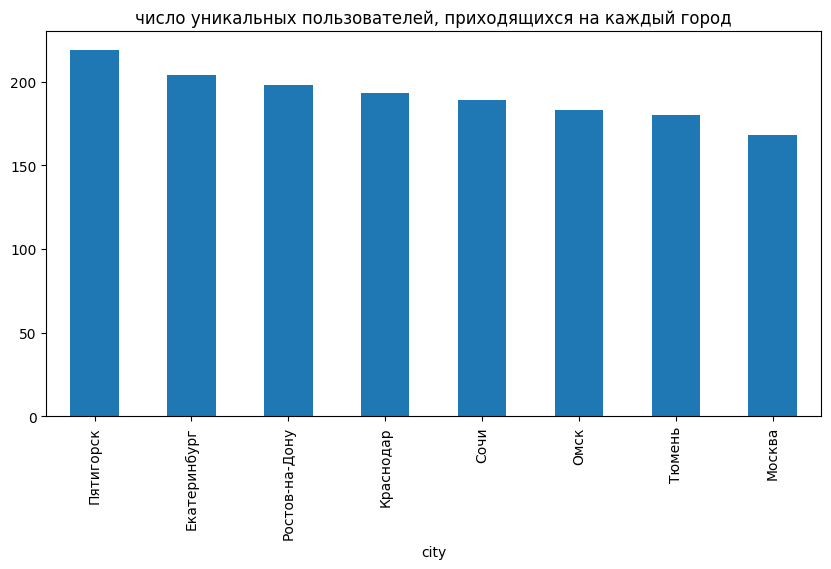

In [13]:
city_freq = (
    users.pivot_table(index='city', values='user_id', aggfunc='count')
    .sort_values(by='user_id', ascending=False)
)
city_freq.columns = ['users_number']
city_freq.plot(
    kind='bar', figsize=(10, 5), legend=False, 
    title='число уникальных пользователей, приходящихся на каждый город'
)
city_freq

В выборку попало приблизительно равное число пользователей из каждого из восьми городов.

##### Cоотношение пользователей с подпиской и без подписки

Доля пользователей без подписки от общего числа: 0.5443285528031291
Доля пользователей с подпиской от общего числа: 0.4556714471968709


,users_number
subscription_type,
free,835
ultra,699


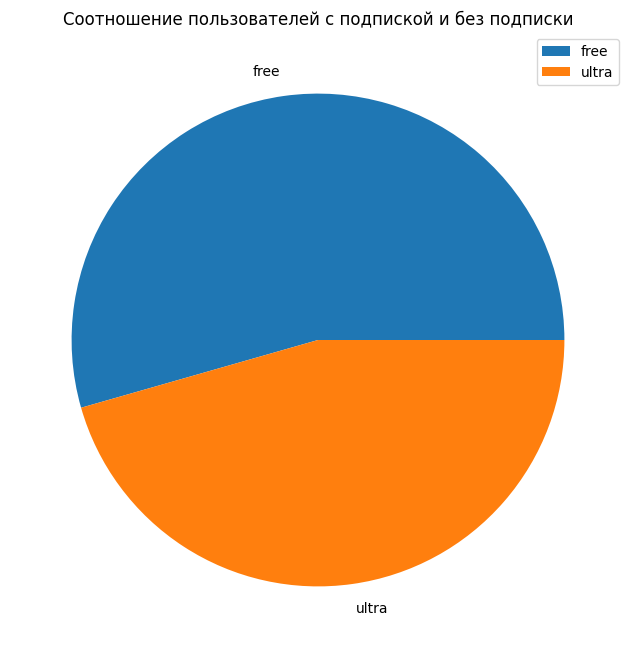

In [14]:
subtype_ratio = users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
subtype_ratio.columns = ['users_number']
subtype_ratio.plot(y='users_number', kind='pie', figsize=(8, 8))
plt.title("Соотношение пользователей с подпиской и без подписки")
plt.ylabel("")
print(f'Доля пользователей без подписки от общего числа: {835/(835+699)}')
print(f'Доля пользователей с подпиской от общего числа: {699/(835+699)}')
subtype_ratio

Пользователей с подпиской немного меньше, чем пользователей без нее.

##### Возраст пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

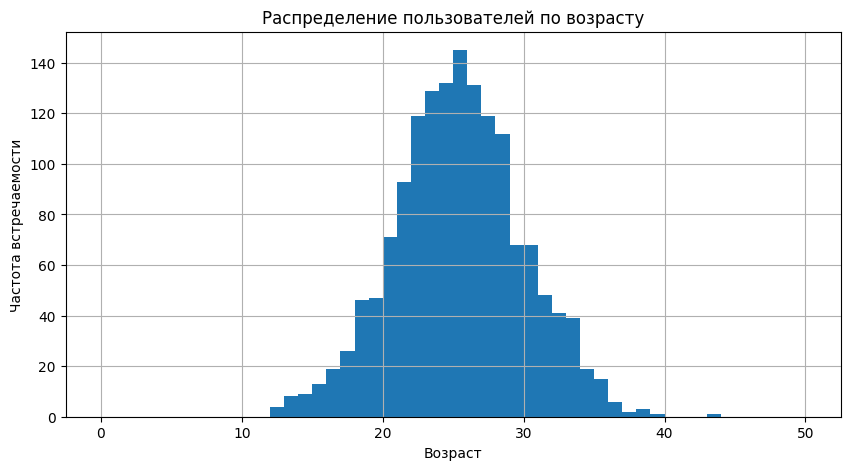

In [15]:
users.hist('age', bins=50, range=(0, 50), figsize=(10, 5))
plt.title("Распределение пользователей по возрасту")
plt.xlabel("Возраст")
plt.ylabel("Частота встречаемости")
users['age'].describe()

Пользователи нормально распределены по возрасту, аномалий нет. Самому молодому пользователю 12 лет, старшему - 43. Средний возраст пользователя около 25 лет.

##### Расстояние, которое пользователь преодолел за одну поездку

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


0.09940225813593093

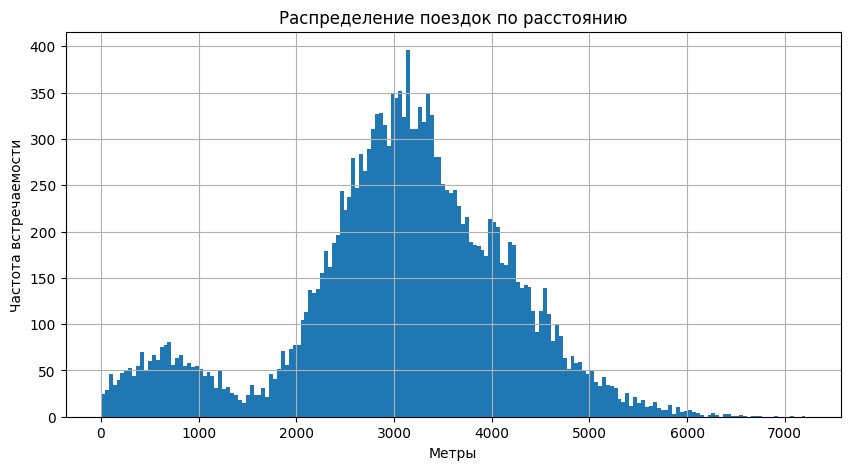

In [16]:
rides.hist('distance', bins=180, figsize=(10, 5))
plt.title("Распределение поездок по расстоянию")
plt.xlabel("Метры")
plt.ylabel("Частота встречаемости")
print(rides['distance'].describe())
rides.query('distance < 1500')['user_id'].count() / 18068

Распределение расстояния выглядит необычно, скорее всего короткие поездки от 0 до 1500 метров как-то обусловлены работой приложения, либо это то расстояния, которое проезжает пользователь, прежде чем понять, что самокат не исправен или разряжен. Доля таких "коротких" поездок составляет 10 процентов.

##### Продолжительность поездок

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

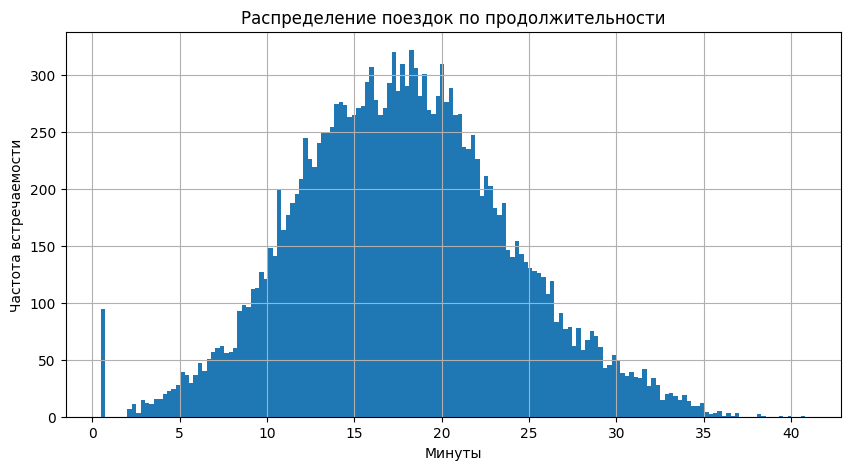

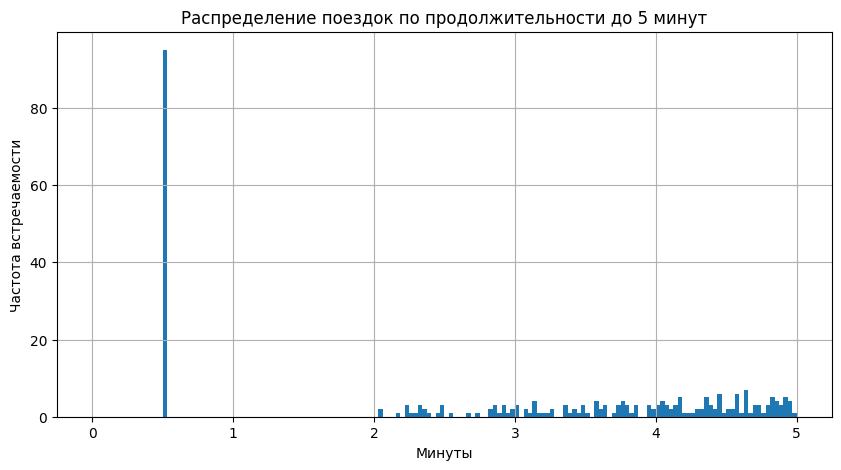

In [17]:
rides.hist('duration', bins=160, figsize=(10, 5))
plt.title("Распределение поездок по продолжительности")
plt.xlabel("Минуты")
plt.ylabel("Частота встречаемости")
rides.hist('duration', bins=160, range=(0, 5), figsize=(10, 5))
plt.title("Распределение поездок по продолжительности до 5 минут")
plt.xlabel("Минуты")
plt.ylabel("Частота встречаемости")
rides['duration'].describe()

Продолжительность поездок распределена нормально, за исключением тех аномальных поездок, которые длились 30 секунд. Возможно, приложение работает таким образом, что длительность поездки пользователей без подписки ограничена 30 секундами при каких-то обстоятельствах.

***Была описана и визуализирована общая информация о пользователях и поездках, найдены некоторые закономерности и аномалии.***

#### Объединение данных

##### Объединяем данные о пользователях, поездках и подписках в один датафрейм

In [18]:
data = rides.merge(users, on='user_id').merge(subs, on='subscription_type')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Число строк и значений в столбцах осталось равно числу строк в таблице c поездками, а значит данные не пропали и не задублировалсь.

##### Создаем датафреймы c данными о пользователях без подписки и с подпиской

In [19]:
sub_users = data.query('subscription_type=="ultra"')
print(sub_users['subscription_type'].unique())
sub_users.head()

['ultra']


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [20]:
unsub_users = data.query('subscription_type!="ultra"').reset_index(drop=True) 
print(unsub_users['subscription_type'].unique())
unsub_users.head()

['free']


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


В таблицу sub_users попали только строки с типом подписки ultra, а в таблицу unsub_users только строки c типом подписки free.

##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

Text(0, 0.5, 'Частота встречаемости')

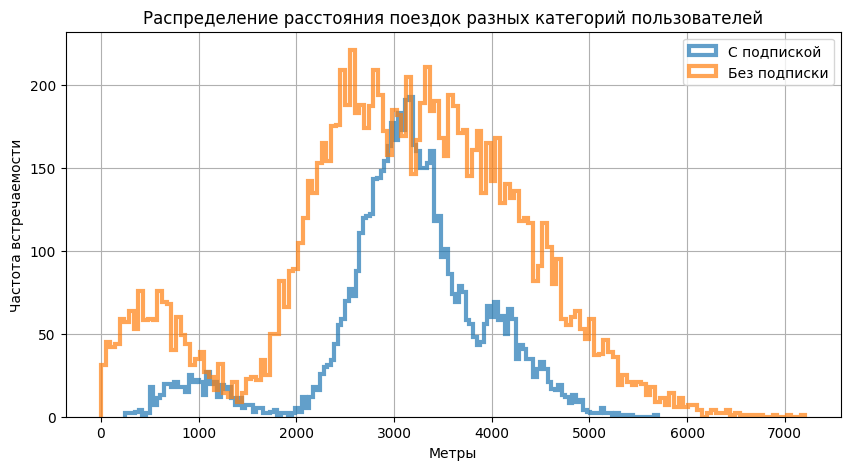

In [21]:
ax = sub_users.plot(
    kind='hist', y='distance', histtype='step', bins=150,
    linewidth=3, alpha=0.7, label='С подпиской',
)
unsub_users.plot(
    kind='hist', y='distance', histtype='step', bins=150, linewidth=3, 
    alpha=0.7, label='Без подписки', ax=ax, grid=True, figsize=(10, 5)
) 
plt.title("Распределение расстояния поездок разных категорий пользователей")
plt.xlabel("Метры")
plt.ylabel("Частота встречаемости")

Text(0, 0.5, 'Частота встречаемости')

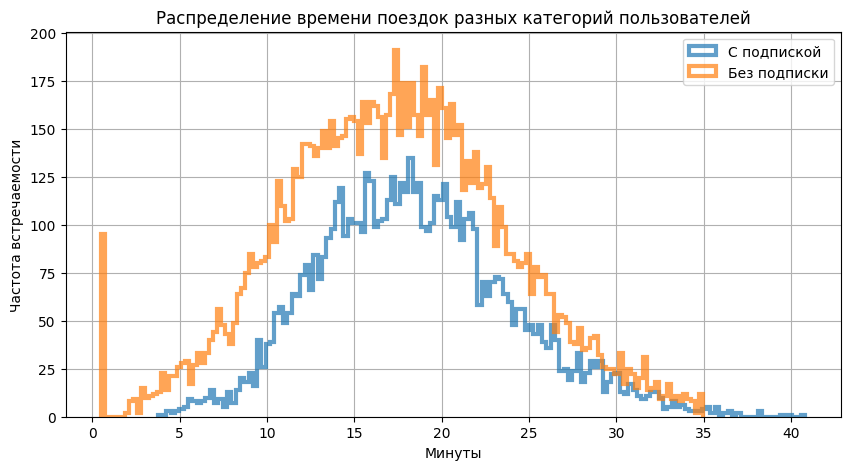

In [22]:
axaxa = sub_users.plot(
    kind='hist', y='duration', histtype='step', bins=150,
    linewidth=3, alpha=0.7, label='С подпиской',
)
unsub_users.plot(
    kind='hist', y='duration', histtype='step', bins=150, linewidth=3,
    alpha=0.7, label='Без подписки', ax=axaxa, grid=True, figsize=(10, 5)
)
plt.title("Распределение времени поездок разных категорий пользователей")
plt.xlabel("Минуты")
plt.ylabel("Частота встречаемости")

In [23]:
unsub_users.shape # размер таблицы пользователей без подписки

(11568, 12)

In [24]:
sub_users.shape  # размер таблицы пользователей с подпиской

(6500, 12)

По графикам видно, что аномалия 30-секундных поездок свойственна только пользователям без подписки, в то время как поездки на условно короткое расстояние присущи обеим группам пользователей. Поездок пользователей без подписок больше и их распределение имеет больший разброс

***Данные из трех начальных таблиц были объединены в таблице data, затем разделены по таблицам sub_users и unsub_users с пользователями с подпиской и без. Проведено сравнение расстояния и времени поездок для разных категорий пользователей.***

#### Подсчёт выручки

##### Создаем датафрейм с агрегированными данными о поездках

In [25]:
data['duration'] = np.ceil(data['duration']) 
data_grouped = data.groupby(
    ['user_id','month']).agg({'distance':['sum', 'count'], 'duration':'sum', 
                              'minute_price':'first', 'start_ride_price':'first', 
                              'subscription_fee':'first', 'subscription_type':'first'}
)

data_grouped.columns = \
['dist_per_month', 'rides_per_month', 'sum_monthly_time', 'mp', 'srp', 'sf', 'sub_type']    

##### Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь

In [26]:
data_grouped['monthly_income'] = data_grouped['srp'] * data_grouped['rides_per_month'] + \
data_grouped['mp'] * data_grouped['sum_monthly_time'] + data_grouped['sf']
#добавил 4 дополнительных столбца для упрощения для себя написания кода, теперь 3 удаляю
data_grouped.drop(['srp', 'mp', 'sf'], axis= 1 , inplace= True ) 
data_grouped.head()

dist_per_month  rides_per_month  sum_monthly_time sub_type  \
user_id month                                                               
1       1         7027.511294                2              42.0    ultra   
        4          754.159807                1               7.0    ultra   
        8         6723.470560                2              46.0    ultra   
        10        5809.911100                2              32.0    ultra   
        11        7003.499363                3              56.0    ultra   

               monthly_income  
user_id month                  
1       1               451.0  
        4               241.0  
        8               475.0  
        10              391.0  
        11              535.0

***Создан датафрейм с агрегированными данными о поездках и столбцом с помесячной выручкой. Допольнительно добавлен столбец sub_type, без которого сложнее было бы писать код для проверки гипотез.***

In [27]:
# Код ревьюера
data_grouped.groupby('sub_type')['monthly_income'].mean()

sub_type
free     328.641365
ultra    362.792191
Name: monthly_income, dtype: float64

#### Проверка гипотез

##### Проверяем гипотезу о том, что пользователи с подпиской тратят больше времени на поездки

In [28]:
# задаём уровень значимости
alpha = 0.05

# временные затраты первой группы пользователей (с подпиской)
sub_duration = sub_users['duration']
 
# временные затраты второй группы пользователей (без подписки)
unsub_duration = unsub_users['duration']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
# добавил equal_var=False потому что выборки разного размера
results = st.ttest_ind(sub_duration, unsub_duration, alternative='greater', equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.675781377128977e-37
Отвергаем нулевую гипотезу


Нулевая гипотеза: средняя продолжительность поездки с подпиской равна средней продолжительности поездки без подписки.

Альтернативная гипотеза: средняя продолжительность поездки с подпиской больше средней продолжительности поездки без подписки.

Полученное значение p-value значительно меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу о равенстве продолжительности поездок. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.

##### Проверяем гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

In [29]:
wear_dist = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    sub_users['distance'], 
    wear_dist,
      alternative='greater')

print('p-значение:', results.pvalue)

if ((results.pvalue) < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 


p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Нулевая гипотеза: среднее расстояние поездки с подпиской равна 3130 метров.

Альтернативная гипотеза: среднее расстояние поездки с подпиской больше 3130 метров.

Полученное значение p-value (~0.919536) намного больше заданного уровня значимости, поэтому нет оснований отвергать нулевую гипотезу. Есть основания говорить, что пользователи с подпиской, за одну поездку, проезжают среднее расстояние, которое не превышает 3130 метров - оптимальное с точки зрения износа самоката.

##### Проверяем гипотезу о том, что помесячная выручка от пользователей с подпиской будет выше, чем выручка от пользователей без подписки

In [30]:
# задаём уровень значимости
alpha = 0.05

# траты первой группы пользователей (с подпиской)
ultra_income = data_grouped.query('sub_type=="ultra"')['monthly_income']

# траты второй группы пользователей (без подписки)
free_income = data_grouped.query('sub_type=="free"')['monthly_income']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
# добавил equal_var=False потому что выборки разного размера
results = st.ttest_ind(ultra_income, free_income, alternative='greater', equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


Нулевая гипотеза: помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.

Альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше помесячной выручки от пользователей без подписки.

Полученное значение p-value значительно меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу о равенстве помесячной выручки. Есть основания говорить, что пользователи с подпиской приносят более высокую помесячную выручку.

##### Какой тест понадобится для проверки гипотезы

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобится для проверки этой гипотезы?

***Выборки в этом случае будут парными. Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, нужно будет применить метод scipy.stats.ttest_rel(), передать ему данные о количестве обращений для каждого пользователя до обновления и после него, указать аргумент alternative='greater', проверится правосторонняя альтернативная гипотеза о том, что истинное среднее генеральной совокупности до изменения больше, чем истинное среднее генеральной совокупности после изменения, то есть гипотеза о том, что количество обращений в техподдержку снизилось.***

#### Вывод
Имея данные о некоторых пользователях популярного сервиса аренды самокатов GoFast из нескольких городов, а также об их поездках, нужно было их проанализировать и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. Чтобы это сделать, сначала был исправлен тип данных в столбце с датой, добавлен столбец с номером месяца для каждой поездки, обработаны дубликаты. Затем была описана и визуализирована общая информация о пользователях и поездках, сделаны выводы о имеющихся данных, например:
* В выборку попало приблизительно равное число пользователей из каждого из восьми городов. 
* Пользователей с подпиской немного меньше, чем пользователей без нее. 
* Пользователи нормально распределены по возрасту, средний возраст пользователя около 25 лет. 
* Продолжительность поездок распределена нормально, за исключением тех поездок, которые длились 30 секунд. Возможно, длительность поездки пользователей без подписки ограничена 30 секундами при каких-то обстоятельствах. 

После этого, данные из трех начальных таблиц были объединены в одну, затем разделены по таблицам с подписанными и не подписанными пользователями, что позволило провести сравнение расстояния и времени поездок для разных категорий пользователей, и сделать некоторые выводы:
* По графикам видно, что аномалия 30-секундных поездок свойственна только пользователям без подписки.
* Число поездок пользователей без подписок - 11568, а с подпиской - 6500.
* Распределение расстояния поездок пользователей без подписок имеет больший разброс.

Следующим шагом было создание датафрейма со столбцами, содержащими информацию о суммарном расстоянии, количестве поездок, суммарном времени для каждого пользователя за каждый месяц и помесячной выручкой. С помощью этой и других таблиц, для проведения акций, с целью увеличения количества пользователей с подпиской, были проверены некоторые гипотезы. В результате их проверки можно сказать, что пользователи с подпиской тратят больше времени на поездки и приносят более высокую помесячную выручку.  Нет оснований считать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. На основании результатов исследования для увеличения количества пользователей с подпиской можно порекомендовать провести акции, например снизить стоимость ежемесячного платежа для новых подписчиков, или временно снизить стоимость одной минуты поездки.